In [1]:
# =============================================================================
# 1. CARGA DE DATOS Y PREPROCESAMIENTO
# =============================================================================
print("=" * 60)
print("1. CARGA DE DATOS Y PREPROCESAMIENTO")
print("=" * 60)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


# Cargar el dataset Iris desde sklearn

iris = load_iris()
X = iris.data  # Características: longitud y ancho de pétalos y sépalos
y = iris.target  # Target: especies de iris (0=setosa, 1=versicolor, 2=virginica)

print("INFORMACIÓN DEL DATASET IRIS:")
print(f"Dataset cargado: {X.shape[0]} muestras, {X.shape[1]} características")
print(f"Clases: {iris.target_names}")
print(f"Distribución de clases: {np.bincount(y)}")

# EXPLICACIÓN DE LAS COLUMNAS EN ESPAÑOL

print("\nVERIFICACIÓN DE CALIDAD DE DATOS:")
print("¿Hay valores nulos en las características?")
print(f"Valores nulos en X: {np.isnan(X).sum()}")  # Debe ser 0
print(f"Valores nulos en y: {np.isnan(y).sum()}")  # Debe ser 0

# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,  # Semilla para reproducibilidad
    stratify=y  # Mantener proporción de clases en train/test
)


print(f"\nDATOS DIVIDIDOS PARA ENTRENAMIENTO Y PRUEBA:")
print(f"   - Entrenamiento: {X_train.shape[0]} muestras")
print(f"   - Prueba: {X_test.shape[0]} muestras")

# Verificar que la división mantuvo las proporciones
print(f"\nDISTRIBUCIÓN DE CLASES EN CONJUNTOS:")
print(f"Entrenamiento: {np.bincount(y_train)}")
print(f"Prueba: {np.bincount(y_test)}")

# Estandarizar características (importante para GaussianNB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1. CARGA DE DATOS Y PREPROCESAMIENTO
INFORMACIÓN DEL DATASET IRIS:
Dataset cargado: 150 muestras, 4 características
Clases: ['setosa' 'versicolor' 'virginica']
Distribución de clases: [50 50 50]

VERIFICACIÓN DE CALIDAD DE DATOS:
¿Hay valores nulos en las características?
Valores nulos en X: 0
Valores nulos en y: 0

DATOS DIVIDIDOS PARA ENTRENAMIENTO Y PRUEBA:
   - Entrenamiento: 105 muestras
   - Prueba: 45 muestras

DISTRIBUCIÓN DE CLASES EN CONJUNTOS:
Entrenamiento: [35 35 35]
Prueba: [15 15 15]


In [2]:
# =============================================================================
# 2. CREACIÓN DEL MODELO NAIVE BAYES
# =============================================================================
print("\n" + "=" * 60)
print("2. CREACIÓN DEL MODELO NAIVE BAYES")
print("=" * 60)

from sklearn.naive_bayes import GaussianNB

# CONCEPTO: Naive Bayes asume que las características son independientes
# GaussianNB asume distribución normal (gaussiana) para características continuas
modelo_nb = GaussianNB()

# =============================================================================
# 3. ENTRENAMIENTO DEL MODELO
# =============================================================================
print("\n" + "=" * 60)
print("3. ENTRENAMIENTO DEL MODELO")
print("=" * 60)

# Entrenar el modelo con datos de entrenamiento
modelo_nb.fit(X_train_scaled, y_train)

print("Modelo entrenado exitosamente")
print("Parámetros aprendidos:")
print(f"   - Clases: {modelo_nb.classes_}")
print(f"   - Probabilidades a priori de cada clase: {modelo_nb.class_prior_}")
print(f"   - Número de características por clase: {modelo_nb.n_features_in_}")



2. CREACIÓN DEL MODELO NAIVE BAYES

3. ENTRENAMIENTO DEL MODELO
Modelo entrenado exitosamente
Parámetros aprendidos:
   - Clases: [0 1 2]
   - Probabilidades a priori de cada clase: [0.33333333 0.33333333 0.33333333]
   - Número de características por clase: 4



4. PREDICCIÓN Y EVALUACIÓN

 PRECISIÓN GLOBAL: 0.9111 (91.11%)

 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

 MATRIZ DE CONFUSIÓN:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


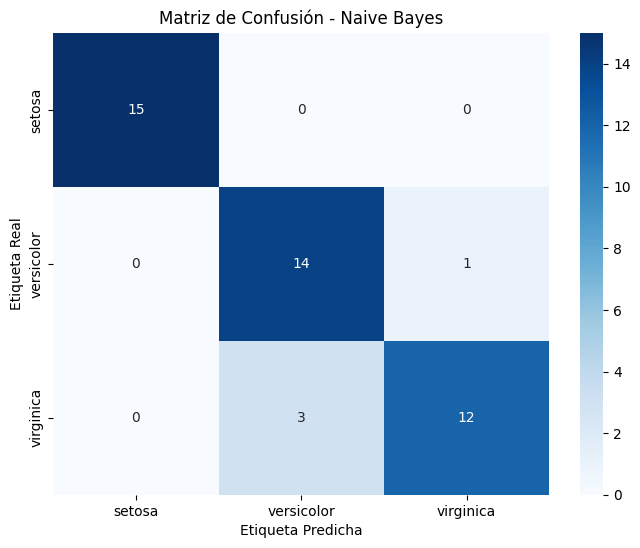

In [3]:
# =============================================================================
# 4. PREDICCIÓN Y EVALUACIÓN
# =============================================================================
print("\n" + "=" * 60)
print("4. PREDICCIÓN Y EVALUACIÓN")
print("=" * 60)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones
y_pred = modelo_nb.predict(X_test_scaled)
y_pred_proba = modelo_nb.predict_proba(X_test_scaled)  # Probabilidades por clase

# Calcular precisión
precision = accuracy_score(y_test, y_pred)
print(f"\n PRECISIÓN GLOBAL: {precision:.4f} ({precision*100:.2f}%)")

# Reporte de clasificación detallado
print("\n REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Matriz de confusión
print(" MATRIZ DE CONFUSIÓN:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Matriz de Confusión - Naive Bayes')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()